In [43]:
!pip install pyts

You should consider upgrading via the 'C:\darsh\Research Internship\research\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
from pyts.image import GramianAngularField

In [2]:
import json
from collections import Counter
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Ellipse
import seaborn as sns
import pandas as pd
import networkx as nx
import base64
from collections import defaultdict
import sys,os
import math
import random
import operator
import csv
import matplotlib.pylab as pyl
import itertools
import scipy as sp
from scipy import stats
from scipy import optimize
from scipy.integrate import quad
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_json("data/events/events_Italy.json")
df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],8327,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959,Pass,3158,1H,2.530536,85,180423957
1,8,Simple pass,[{'id': 1801}],20438,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959,Pass,3158,1H,3.768418,85,180423958
2,7,Touch,[],8306,"[{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]",2575959,Others on the ball,3158,1H,4.868265,72,180423959
3,1,Ground attacking duel,"[{'id': 504}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 56, 'x': 78}, {'y': 15, 'x': 64}]",2575959,Duel,3158,1H,8.114676,11,180423960
4,1,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 15, 'x': 64}, {'y': 15, 'x': 72}]",2575959,Duel,3158,1H,8.647892,11,180423961


In [4]:
time_event = df[['eventSec', 'eventName','matchId','teamId']]


In [5]:
time_event = time_event.loc[time_event['matchId'] == 2575959]
time_event.shape

(1613, 4)

In [6]:
fix_event = pd.DataFrame(time_event)
fe = fix_event.reset_index()

In [7]:
fe.head()#match id =

,index,eventSec,eventName,matchId,teamId
0,0,2.530536,Pass,2575959,3158
1,1,3.768418,Pass,2575959,3158
2,2,4.868265,Others on the ball,2575959,3158
3,3,8.114676,Duel,2575959,3158
4,4,8.647892,Duel,2575959,3158


In [8]:
fe = fe.drop(columns=['index', 'matchId'])

In [9]:
fe.head()

,eventSec,eventName,teamId
0,2.530536,Pass,3158
1,3.768418,Pass,3158
2,4.868265,Others on the ball,3158
3,8.114676,Duel,3158
4,8.647892,Duel,3158


In [10]:
ht = fe.loc[fe['teamId']==3158]
ht = ht.drop(columns=['teamId'])
ht

,eventSec,eventName
0,2.530536,Pass
1,3.768418,Pass
2,4.868265,Others on the ball
3,8.114676,Duel
4,8.647892,Duel
...,...,...
1603,2976.057300,Others on the ball
1605,2978.827236,Others on the ball
1606,2980.286156,Pass
1607,2983.099386,Pass


In [12]:

for index,rows in fe.iterrows() :
    if rows['eventSec']>0:
        rows['eventSec'] = rows['eventSec'] + (2 - rows['eventSec']) % 2
    #fe.set_value(index,'eventSec',rows['eventSec'])
    fe.at[index,'eventSec'] = rows['eventSec']
    
    
    

In [13]:
one_hot_encoded_data = pd.get_dummies(ht, columns = ['eventName'])
one_hot_encoded_data = one_hot_encoded_data.reset_index()
one_hot_encoded_data = one_hot_encoded_data.drop(columns=['index'])
one_hot_encoded_data.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
0,2.530536,0,0,0,0,0,0,1,0,0
1,3.768418,0,0,0,0,0,0,1,0,0
2,4.868265,0,0,0,0,0,1,0,0,0
3,8.114676,1,0,0,0,0,0,0,0,0
4,8.647892,1,0,0,0,0,0,0,0,0


In [14]:
one_hot_encoded_data.shape

(711, 10)

In [15]:
rslt_df = one_hot_encoded_data.sort_values(by = 'eventSec')
rslt_df.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
0,2.530536,0,0,0,0,0,0,1,0,0
1,3.768418,0,0,0,0,0,0,1,0,0
2,4.868265,0,0,0,0,0,1,0,0,0
3,8.114676,1,0,0,0,0,0,0,0,0
4,8.647892,1,0,0,0,0,0,0,0,0


In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(rslt_df)

        eventSec  eventName_Duel  eventName_Foul  eventName_Free Kick  \
0       2.530536               0               0                    0   
1       3.768418               0               0                    0   
2       4.868265               0               0                    0   
3       8.114676               1               0                    0   
4       8.647892               1               0                    0   
5      10.376066               0               0                    0   
6      10.796797               1               0                    0   
7      12.418937               1               0                    0   
8      17.715422               1               0                    0   
9      19.153235               0               0                    0   
10     20.873026               0               0                    0   
11     21.503835               0               0                    0   
12     23.201103               0               0   

In [17]:
one_hot_encoded_data = one_hot_encoded_data.groupby('eventSec').sum()

In [18]:
one_hot_encoded_data.shape

(711, 9)

In [19]:
one_hot_encoded_data.reset_index(inplace=True)

In [20]:
one_hot_encoded_data.shape

(711, 10)

In [21]:
one_hot_encoded_data.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
0,2.530536,0,0,0,0,0,0,1,0,0
1,3.768418,0,0,0,0,0,0,1,0,0
2,4.868265,0,0,0,0,0,1,0,0,0
3,8.114676,1,0,0,0,0,0,0,0,0
4,8.647892,1,0,0,0,0,0,0,0,0


In [22]:
one_hot_encoded_data['eventName_Free Kick'].cumsum()
#,'one_hot_encoded_data','eventName_Free Kick','eventName_Goalkeeper leaving line','eventName_Offside','eventName_Others on the ball','eventName_Pass','eventName_Save attempt','eventName_Shot'

0       0
1       0
2       0
3       0
4       0
       ..
706    55
707    55
708    55
709    55
710    55
Name: eventName_Free Kick, Length: 711, dtype: uint32

In [23]:
heat = one_hot_encoded_data

In [24]:
heat.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
0,2.530536,0,0,0,0,0,0,1,0,0
1,3.768418,0,0,0,0,0,0,1,0,0
2,4.868265,0,0,0,0,0,1,0,0,0
3,8.114676,1,0,0,0,0,0,0,0,0
4,8.647892,1,0,0,0,0,0,0,0,0


In [56]:
heat.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
0,2.530536,0,0,0,0,0,0,1,0,0
1,3.768418,0,0,0,0,0,0,1,0,0
2,4.868265,0,0,0,0,0,1,0,0,0
3,8.114676,1,0,0,0,0,0,0,0,0
4,8.647892,1,0,0,0,0,0,0,0,0


In [25]:
grt  = pd.concat([heat[['eventName_Duel', 'eventName_Foul','eventName_Free Kick','eventName_Goalkeeper leaving line','eventName_Offside','eventName_Others on the ball','eventName_Pass','eventName_Save attempt','eventName_Shot']].cumsum(),heat['eventSec']],axis = 1)

In [26]:
grt.head()

,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot,eventSec
0,0,0,0,0,0,0,1,0,0,2.530536
1,0,0,0,0,0,0,2,0,0,3.768418
2,0,0,0,0,0,1,2,0,0,4.868265
3,1,0,0,0,0,1,2,0,0,8.114676
4,2,0,0,0,0,1,2,0,0,8.647892


In [27]:
grt.shape

(711, 10)

In [28]:
serie = []
serie.append(grt['eventName_Duel'])
serie.append(grt['eventName_Foul'])
serie.append(grt['eventName_Free Kick'])
serie.append(grt['eventName_Goalkeeper leaving line'])
serie.append(grt['eventName_Offside'])
serie.append(grt['eventName_Others on the ball'])
serie.append(grt['eventName_Pass'])
serie.append(grt['eventName_Save attempt'])
serie.append(grt['eventName_Shot'])
serie.append(grt['eventSec'])
serie[0][0]

0

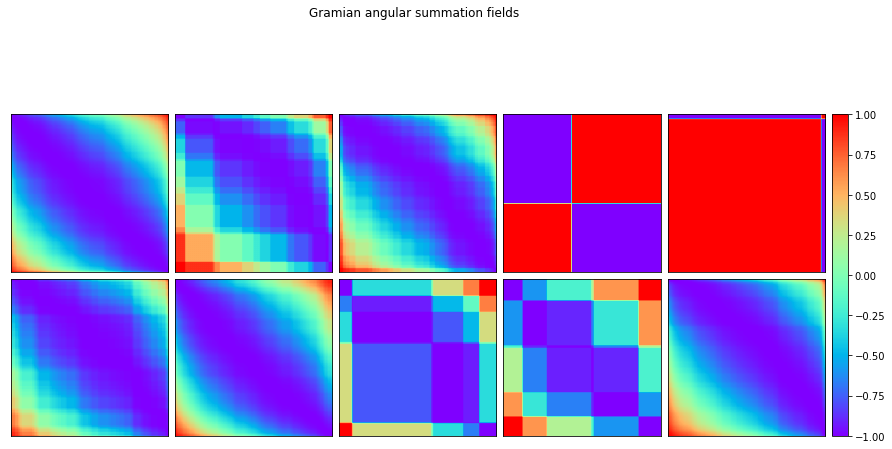

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField

# Load the GunPoint dataset
X  = serie

# Get the Gramian angular summation fields for all the time series
gaf = GramianAngularField()
X_gaf = gaf.fit_transform(X)

# Plot the 50 Gramian angular fields
fig = plt.figure(figsize=(15, 7.5))

grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.1, share_all=True,
                 cbar_mode='single')
for i, ax in enumerate(grid):
    im = ax.imshow(X_gaf[i], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

fig.suptitle("Gramian angular summation fields ", y=1)

plt.show()